<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_TelecomX-_2---Prevendo-Churn/blob/main/Challenge_ONE_Data_Science_TelecomX__2_Prevendo_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('/content/TelecomX_Data_normalizado2.csv')

# Convers√£o de tipos
df['Churn'] = df['Churn'].astype(bool)
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('category')
df['customer_tenure'] = df['customer_tenure'].astype(int)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Tratamento de valores ausentes
df.dropna(subset=['account_Charges_Total'], inplace=True)


# Estat√≠sticas descritivas
print("Resumo estat√≠stico:")
print(df.describe())

Resumo estat√≠stico:
       customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7256.000000              7256.000000            7256.000000   
mean         32.395535                64.755423            2280.634213   
std          24.558067                30.125739            2268.632997   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.450000             400.225000   
50%          29.000000                70.300000            1391.000000   
75%          55.000000                89.900000            3785.300000   
max          72.000000               118.750000            8684.800000   

       Contas_Diarias  qtd_servicos  
count     7256.000000   7256.000000  
mean         2.158467      2.034454  
std          1.004282      1.848105  
min          0.610000      0.000000  
25%          1.180000      0.000000  
50%          2.340000      2.000000  
75%          3.000000      3.000000  
max     

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7256 non-null   bool    
 2   customer_gender            7256 non-null   object  
 3   customer_SeniorCitizen     7256 non-null   category
 4   customer_Partner           7256 non-null   object  
 5   customer_Dependents        7256 non-null   object  
 6   customer_tenure            7256 non-null   int64   
 7   phone_PhoneService         7256 non-null   object  
 8   phone_MultipleLines        7256 non-null   bool    
 9   internet_InternetService   7256 non-null   object  
 10  internet_OnlineSecurity    7256 non-null   bool    
 11  internet_OnlineBackup      7256 non-null   bool    
 12  internet_DeviceProtection  7256 non-null   bool    
 13  internet_TechSupport       7256 non-nu

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Evita altera√ß√µes no original
df = df.copy()

# Transforma√ß√£o de vari√°veis booleanas para inteiros
bool_cols = df.select_dtypes(include='bool').columns.tolist()
df[bool_cols] = df[bool_cols].astype(int)

#  Convers√£o de colunas categ√≥ricas para num√©ricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols.remove('customerID')  # Removido porque √© apenas identificador
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#  Normaliza√ß√£o de colunas num√©ricas
num_cols = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias', 'qtd_servicos']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Separando features e target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].astype(int)  # Target bin√°rio

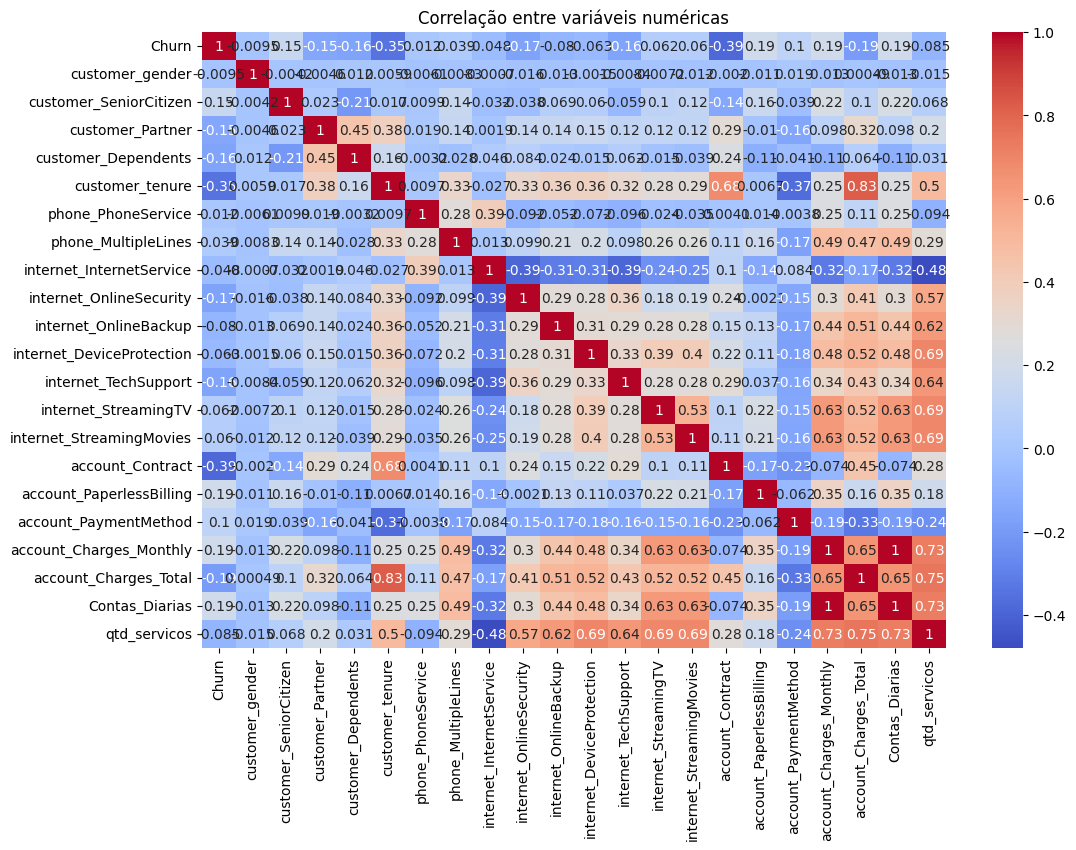

In [8]:
# Ver correla√ß√£o com a vari√°vel target
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correla√ß√£o entre vari√°veis num√©ricas")
plt.show()

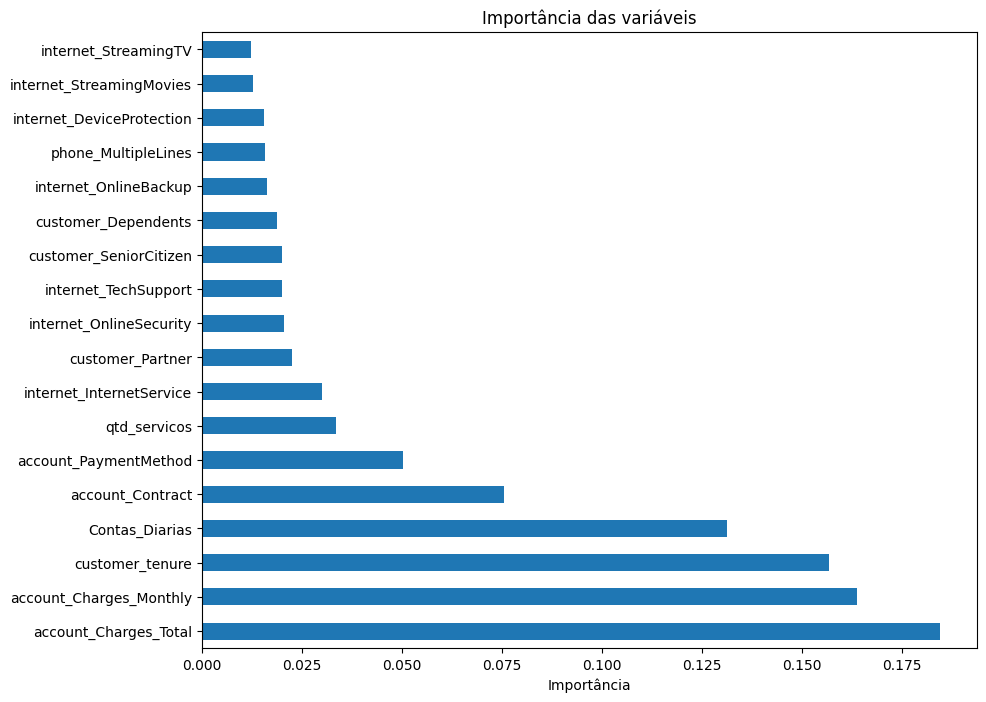

In [9]:
# Eliminar colunas n√£o √∫teis
drop_cols = ['customerID', 'customer_gender', 'phone_PhoneService', 'account_PaperlessBilling']
df_clean = df.drop(columns=drop_cols)

# Verificar import√¢ncia das vari√°veis com modelo simples
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Preparando dados
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'].astype(int)

# Codifica√ß√£o de vari√°veis categ√≥ricas (simples)
X = pd.get_dummies(X)

# Treinamento b√°sico para an√°lise de import√¢ncia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Plotar import√¢ncia
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(10, 8), title="Import√¢ncia das vari√°veis")
plt.xlabel("Import√¢ncia")
plt.show()

**An√°lises direcionadas**

/tmp/ipython-input-32-1890357503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='Set2')


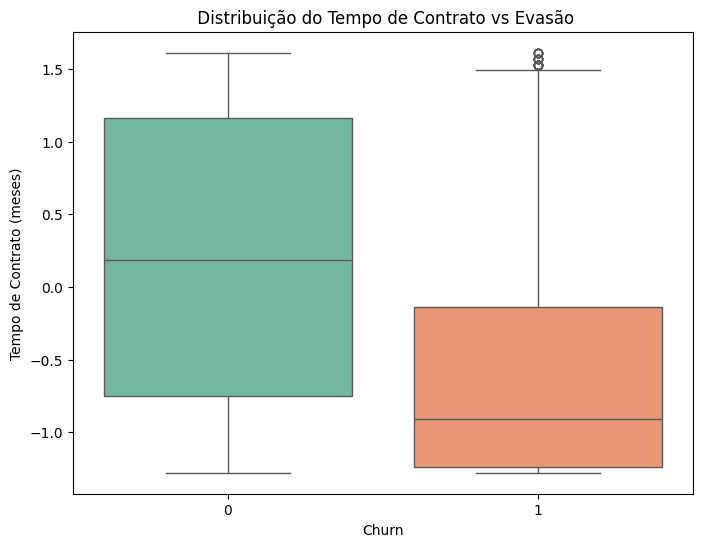

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df, palette='Set2')
plt.title(" Distribui√ß√£o do Tempo de Contrato vs Evas√£o")
plt.xlabel("Churn")
plt.ylabel("Tempo de Contrato (meses)")
plt.show()

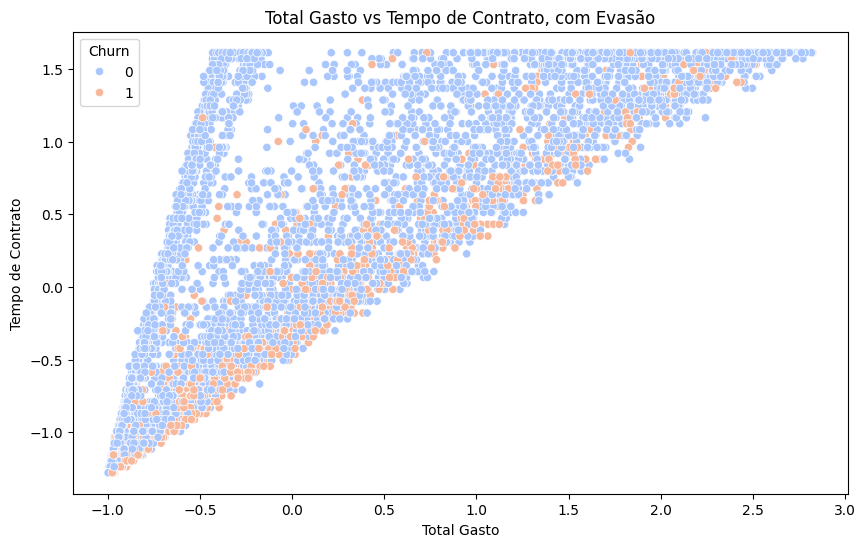

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='account_Charges_Total', y='customer_tenure', hue='Churn', data=df, palette='coolwarm')
plt.title("Total Gasto vs Tempo de Contrato, com Evas√£o")
plt.xlabel("Total Gasto")
plt.ylabel("Tempo de Contrato")
plt.legend(title='Churn')
plt.show()

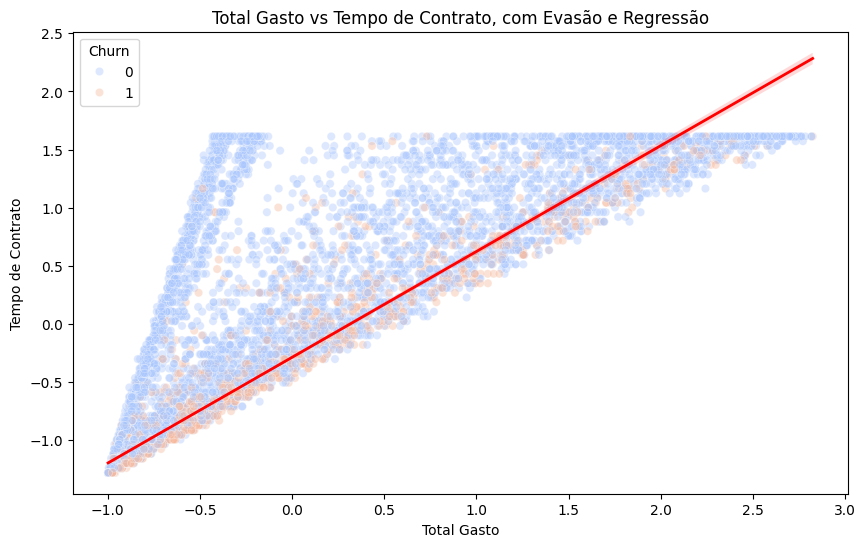

In [34]:
import matplotlib.pyplot as plt

# Filtra apenas clientes que evadiram
df_churn_1 = df[df['Churn'] == 1]

plt.figure(figsize=(10, 6))

# Dispers√£o para todos os dados, com Churn colorido
sns.scatterplot(
    x='account_Charges_Total',
    y='customer_tenure',
    hue='Churn',
    data=df,
    palette='coolwarm',
    alpha=0.4
)

# Linha de regress√£o para churn=1
sns.regplot(
    x='account_Charges_Total',
    y='customer_tenure',
    data=df_churn_1,
    scatter=False,
    color='red',
    line_kws={'label': 'Churn = 1 (Regress√£o)', 'linewidth': 2}
)

plt.title("Total Gasto vs Tempo de Contrato, com Evas√£o e Regress√£o")
plt.xlabel("Total Gasto")
plt.ylabel("Tempo de Contrato")
plt.legend(title='Churn')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtra clientes que evadiram
df_churn_1 = df[df['Churn'] == 1]

# Reshape para regress√£o
X_churn = df_churn_1['account_Charges_Total'].values.reshape(-1, 1)
y_churn = df_churn_1['customer_tenure'].values

# Ajusta modelo
modelo_linear = LinearRegression()
modelo_linear.fit(X_churn, y_churn)

# Coeficientes
coef = modelo_linear.coef_[0]
intercept = modelo_linear.intercept_

print("Regress√£o linear para clientes que evadiram (Churn = 1):")
print(f"Inclina√ß√£o (coeficiente): {coef:.3f}")
print(f"Intercepto: {intercept:.3f}")

Regress√£o linear para clientes que evadiram (Churn = 1):
Inclina√ß√£o (coeficiente): 0.910
Intercepto: -0.287


In [36]:
# Regress√£o para clientes que permaneceram
df_churn_0 = df[df['Churn'] == 0]
X_no_churn = df_churn_0['account_Charges_Total'].values.reshape(-1, 1)
y_no_churn = df_churn_0['customer_tenure'].values

modelo_no_churn = LinearRegression()
modelo_no_churn.fit(X_no_churn, y_no_churn)

coef_no_churn = modelo_no_churn.coef_[0]
intercept_no_churn = modelo_no_churn.intercept_

# Impress√£o dos resultados
print("üìä Comparativo de regress√µes lineares:")
print("‚û° Clientes que evadiram (Churn = 1):")
print(f"   Inclina√ß√£o: {coef:.3f}")
print(f"   Intercepto: {intercept:.3f}")

print("‚û° Clientes que permaneceram (Churn = 0):")
print(f"   Inclina√ß√£o: {coef_no_churn:.3f}")
print(f"   Intercepto: {intercept_no_churn:.3f}")

üìä Comparativo de regress√µes lineares:
‚û° Clientes que evadiram (Churn = 1):
   Inclina√ß√£o: 0.910
   Intercepto: -0.287
‚û° Clientes que permaneceram (Churn = 0):
   Inclina√ß√£o: 0.760
   Intercepto: 0.117


/tmp/ipython-input-38-618494361.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


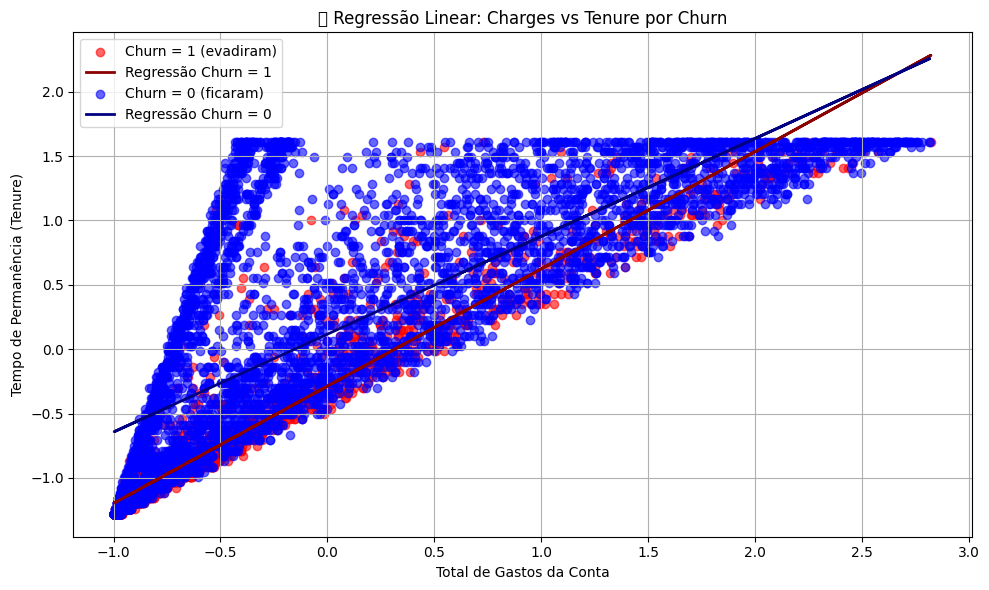

In [38]:
import matplotlib.pyplot as plt

# Dados dos dois grupos
X_churn_flat = X_churn.flatten()
X_no_churn_flat = X_no_churn.flatten()

# Previs√µes
y_pred_churn = modelo_linear.predict(X_churn)
y_pred_no_churn = modelo_no_churn.predict(X_no_churn)

# Cria o gr√°fico
plt.figure(figsize=(10, 6))

# Clientes que evadiram
plt.scatter(X_churn_flat, y_churn, color='red', alpha=0.6, label='Churn = 1 (evadiram)')
plt.plot(X_churn_flat, y_pred_churn, color='darkred', linewidth=2, label='Regress√£o Churn = 1')

# Clientes que permaneceram
plt.scatter(X_no_churn_flat, y_no_churn, color='blue', alpha=0.6, label='Churn = 0 (ficaram)')
plt.plot(X_no_churn_flat, y_pred_no_churn, color='navy', linewidth=2, label='Regress√£o Churn = 0')

# Est√©tica
plt.title('üìä Regress√£o Linear: Charges vs Tenure por Churn')
plt.xlabel('Total de Gastos da Conta')
plt.ylabel('Tempo de Perman√™ncia (Tenure)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Teste de modelos


In [23]:
# Contagem absoluta de classes
contagem_churn = df['Churn'].value_counts()

# Propor√ß√£o relativa
proporcao_churn = df['Churn'].value_counts(normalize=True) * 100

print("Quantidade de clientes:")
print(contagem_churn)
print("\nPropor√ß√£o de clientes (%):")
print(proporcao_churn.round(2))

Quantidade de clientes:
Churn
0    5387
1    1869
Name: count, dtype: int64

Propor√ß√£o de clientes (%):
Churn
0    74.24
1    25.76
Name: proportion, dtype: float64


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Divis√£o antes do balanceamento
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Aplicando SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificando nova distribui√ß√£o
print("Classe balanceada com SMOTE:")
print(pd.Series(y_train_bal).value_counts())

Classe balanceada com SMOTE:
Churn
0    4288
1    4288
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest com melhor estimador
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
rf_pred = rf_model.predict(X_test)

In [26]:
# XGBoost com melhores par√¢metros
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)
xgb_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:08:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
# Regress√£o Log√≠stica ajustada
lr_model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
lr_model.fit(X_train_bal, y_train_bal)
lr_pred = lr_model.predict(X_test)

Desempenho dos modelos com SMOTE:
                Modelo  Acur√°cia  ROC AUC
0        Random Forest     76.24    73.25
1              XGBoost     75.21    75.16
2  Regress√£o Log√≠stica     71.63    76.45


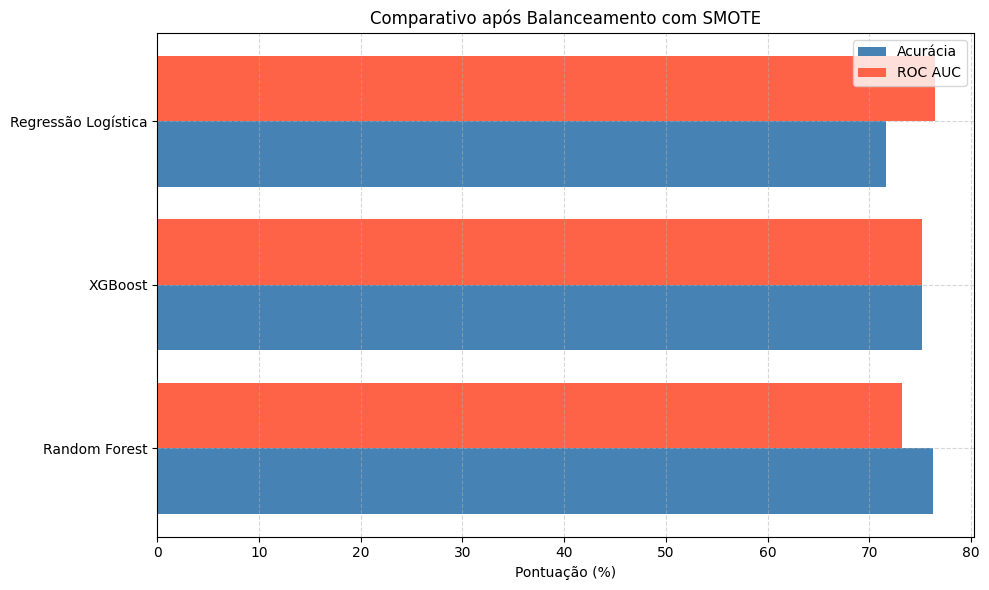

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Avalia√ß√£o
resultados_balanceados = {
    'Modelo': ['Random Forest', 'XGBoost', 'Regress√£o Log√≠stica'],
    'Acur√°cia': [
        accuracy_score(y_test, rf_pred) * 100,
        accuracy_score(y_test, xgb_pred) * 100,
        accuracy_score(y_test, lr_pred) * 100
    ],
    'ROC AUC': [
        roc_auc_score(y_test, rf_pred) * 100,
        roc_auc_score(y_test, xgb_pred) * 100,
        roc_auc_score(y_test, lr_pred) * 100
    ]
}

# Exibi√ß√£o tabular
df_balanceado = pd.DataFrame(resultados_balanceados)
print("Desempenho dos modelos com SMOTE:")
print(df_balanceado.round(2))

# Gr√°fico
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(df_balanceado))

plt.barh(x, df_balanceado['Acur√°cia'], height=bar_width, color='steelblue', label='Acur√°cia')
plt.barh([i + bar_width for i in x], df_balanceado['ROC AUC'], height=bar_width, color='tomato', label='ROC AUC')
plt.yticks([i + bar_width/2 for i in x], df_balanceado['Modelo'])
plt.xlabel("Pontua√ß√£o (%)")
plt.title("Comparativo ap√≥s Balanceamento com SMOTE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Correla√ß√£o com a evas√£o (Churn):
Churn                        1.000
Contas_Diarias               0.189
account_Charges_Monthly      0.189
account_PaperlessBilling     0.186
customer_SeniorCitizen       0.146
account_PaymentMethod        0.105
internet_StreamingTV         0.062
internet_StreamingMovies     0.060
phone_MultipleLines          0.039
phone_PhoneService           0.012
customer_gender             -0.009
internet_InternetService    -0.048
internet_DeviceProtection   -0.063
internet_OnlineBackup       -0.080
qtd_servicos                -0.085
customer_Partner            -0.148
customer_Dependents         -0.160
internet_TechSupport        -0.160
internet_OnlineSecurity     -0.167
account_Charges_Total       -0.194
customer_tenure             -0.346
account_Contract            -0.387
Name: Churn, dtype: float64


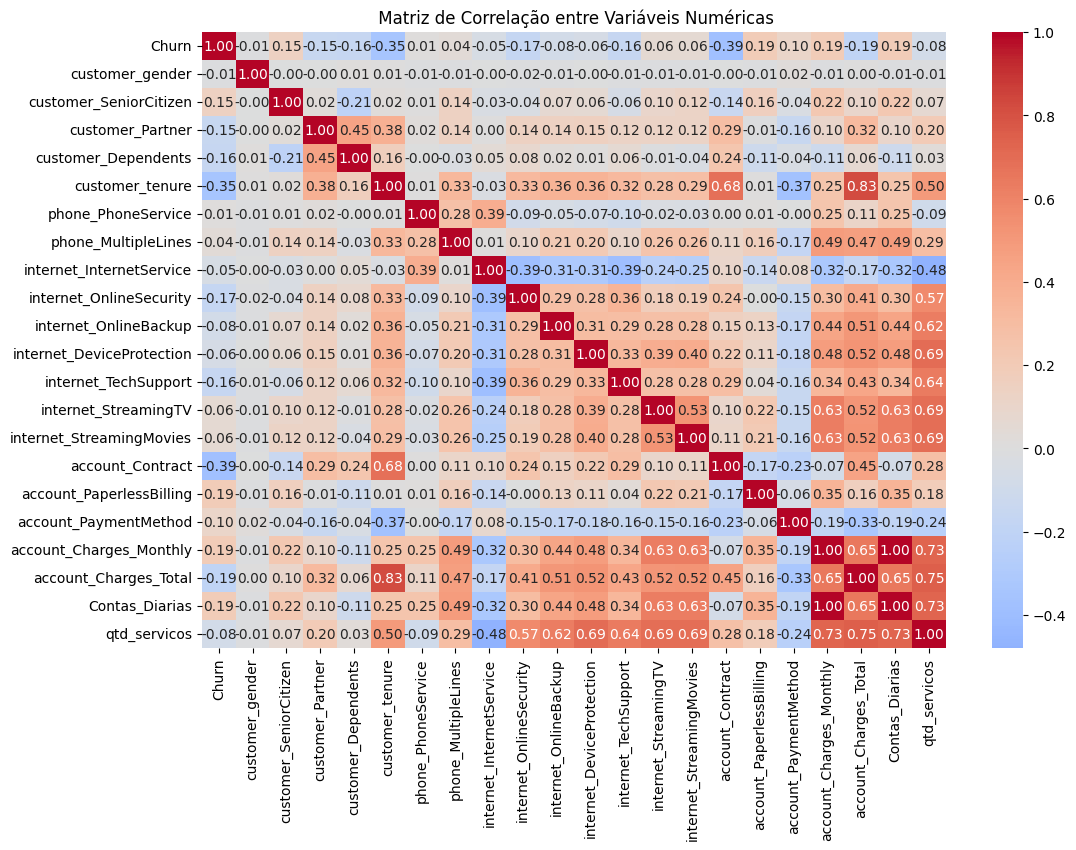

In [30]:
# Certifique-se de que 'Churn' seja num√©rico
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].astype(int)

#  Sele√ß√£o apenas de colunas num√©ricas
num_cols = df_corr.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correla√ß√£o
corr_matrix = df_corr[num_cols].corr()

# Correla√ß√£o com a vari√°vel 'Churn'
print("Correla√ß√£o com a evas√£o (Churn):")
print(corr_matrix['Churn'].sort_values(ascending=False).round(3))

# Visualiza√ß√£o gr√°fica
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title(" Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas")
plt.show()